# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.insert(0, "D:\\semantic_data_lake\\semantic_data_lake")

import matplotlib

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, DataFrame
from pyspark.sql.types import StringType, IntegerType, FloatType, DoubleType
from pyspark.sql.functions import udf, col, pandas_udf, PandasUDFType, collect_list, count, avg, lit

In [2]:
# create Spark Config
conf = SparkConf()
conf.set("spark.executor.instances","4")
conf.set("spark.executor.cores","4")
conf.set("spark.executor.memory", "8g")
conf.set("spark.driver.memory", "8g")
conf.set("spark.memory.offHeap.enabled", "true")
conf.set("spark.memory.offHeap.size", "16g")
conf.setMaster("local[*]")
conf.setAppName("MLB-similarity-calc")
# create a SparkSession
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# Loading Data

In [2]:
file_join = "semantic_data_lake/semantic_data_lake/results/emd_cos_result_dist_calcs.csv"
#file_join = "results/emd_cos_result_dist_calcs.csv"
resultDF_join = pd.read_csv(file_join)

file_join_sep_inst = "semantic_data_lake/semantic_data_lake/results/emd_result_dist_calcs_sep_instances.csv"
resultDF_join_sep_inst = pd.read_csv(file_join_sep_inst)

file_join_sep_inst_grb10 = "semantic_data_lake/semantic_data_lake/results/emd_result_dist_calcs_sep_instances_group_max10.csv"
resultDF_join_sep_inst_grb10 = pd.read_csv(file_join_sep_inst_grb10)

result_join_sep_inst_grb1 = pickle.load(open("/semantic_data_lake/semantic_data_lake/results/emd_result_dist_calcs_sep_instances_group_max1.p","rb"))

# old results without string-attr joins
file = "semantic_data_lake/semantic_data_lake/results/one_col_metric_results_MLB_1_H.p"
resultDF = pickle.load(open(file, "rb"))

resultDF_pd = pd.DataFrame(resultDF)

In [3]:
resultDF_join

,OUTER,OUTER_ATTR,INNER,INNER_ATTR,EMD,COS
0,MLB_1,H,MLB_10,SLG,12.822871,0.434319
1,MLB_1,H,MLB_10,pwRC.,154.058803,0.160242
2,MLB_1,H,MLB_10,BIP,1.751783,0.701838
3,MLB_1,H,MLB_10,BABIP,12.888356,0.452577
4,MLB_1,H,MLB_10,GIDP,12.731325,0.378998
...,...,...,...,...,...,...
2157,MLB_1,H,MLB_9,FB.,12.826460,0.371008
2158,MLB_1,H,MLB_9,GB,5.942587,0.607444
2159,MLB_1,H,MLB_9,Number of Records,12.282462,0.696688
2160,MLB_1,H,MLB_9,ISO,13.076991,0.285669


In [4]:
resultDF_pd = resultDF_pd.dropna()
resultDF_pd

,ref_table,col_name,table_names,wasser_dis,ks_pvalue
0,MLB_1,H,MLB_1,0.046686,9.990170e-01
1,MLB_1,H,MLB_10,7.542334,0.000000e+00
2,MLB_1,H,MLB_11,7.552155,0.000000e+00
3,MLB_1,H,MLB_12,0.084562,8.530889e-01
4,MLB_1,H,MLB_13,0.071873,9.668649e-01
5,MLB_1,H,MLB_14,0.042999,9.890598e-01
6,MLB_1,H,MLB_15,7.021363,0.000000e+00
7,MLB_1,H,MLB_16,7.017094,0.000000e+00
8,MLB_1,H,MLB_17,7.017122,0.000000e+00
9,MLB_1,H,MLB_18,7.018814,0.000000e+00


# similarities of H - H combinations (from MLB_1.H -> all other MLB-Tables.H)

In [5]:
resultDF_H_H_join = resultDF_join[resultDF_join["INNER_ATTR"] == "H"].reset_index(drop=True)
resultDF_H_H_join

,OUTER,OUTER_ATTR,INNER,INNER_ATTR,EMD,COS
0,MLB_1,H,MLB_10,H,8.422857,0.517438
1,MLB_1,H,MLB_11,H,8.422857,0.517438
2,MLB_1,H,MLB_12,H,0.000000,0.868746
3,MLB_1,H,MLB_13,H,0.000000,0.868746
4,MLB_1,H,MLB_14,H,0.000000,0.868746
5,MLB_1,H,MLB_15,H,10.265999,0.704795
6,MLB_1,H,MLB_16,H,10.265999,0.704795
7,MLB_1,H,MLB_17,H,10.265999,0.704795
8,MLB_1,H,MLB_18,H,10.265999,0.704795
9,MLB_1,H,MLB_19,H,2.046170,0.631971


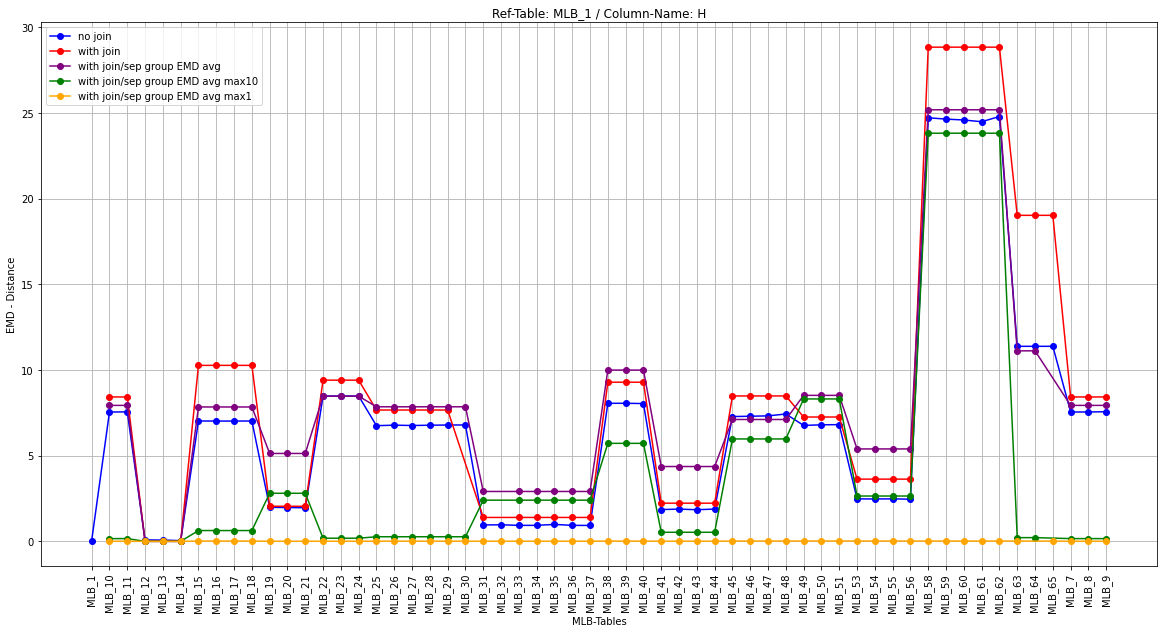

In [6]:
fig, ax1 = plt.subplots(figsize=(20,10))

plt.xticks(rotation=90)
plt.grid(True, axis='both', which='both')
plt.title(f"Ref-Table: {resultDF_H_H_join.iloc[0].OUTER} / Column-Name: {resultDF_H_H_join.iloc[0].OUTER_ATTR}")

ax1.set_xlabel("MLB-Tables")
ax1.set_ylabel("EMD - Distance")
ax1.plot(resultDF_pd["table_names"], resultDF_pd["wasser_dis"], color="blue", marker="o", label="no join")
ax1.plot(resultDF_H_H_join.INNER, resultDF_H_H_join.EMD, color="red", marker="o", label="with join")
ax1.plot(resultDF_join_sep_inst.INNER, resultDF_join_sep_inst.EMD, color="purple", marker="o", label="with join/sep group EMD avg")
ax1.plot(resultDF_join_sep_inst_grb10.INNER, resultDF_join_sep_inst_grb10.EMD, color="green", marker="o", label="with join/sep group EMD avg max10")
ax1.plot(result_join_sep_inst_grb1[0], result_join_sep_inst_grb1[1], color="orange", marker="o", label="with join/sep group EMD avg max1")

ax1.legend()

#ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis


# ax2.set_ylabel("COS-Distance", color=color)
# ax2.plot(resultDF_H_H_join.INNER, resultDF_H_H_join.COS, color=color)
# ax2.tick_params(axis='y', labelcolor=color)



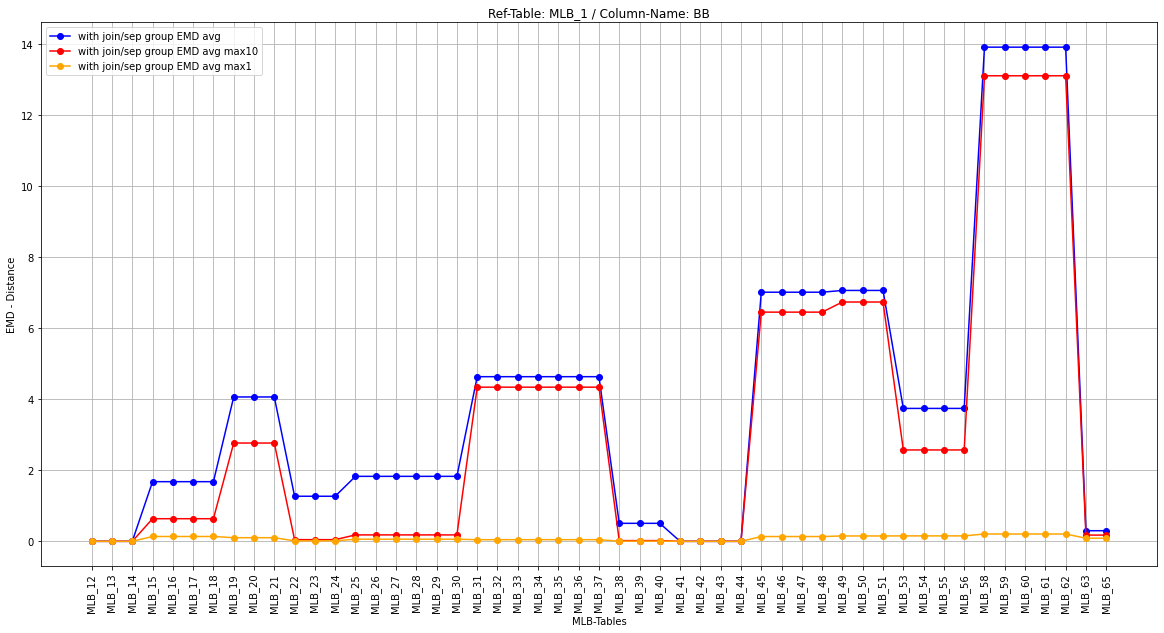

In [3]:
# plot emd distance for column BB on different max number of group elements

# load pickle files, which contains results
results_1 = pickle.load(open("/semantic_data_lake/semantic_data_lake/results/emd_result_dist_calcs_sep_instances_group_max1_BB.p","rb"))
results_10 = pickle.load(open("/semantic_data_lake/semantic_data_lake/results/emd_result_dist_calcs_sep_instances_group_max10_BB.p","rb"))
results_1000000 = pickle.load(open("/semantic_data_lake/semantic_data_lake/results/emd_result_dist_calcs_sep_instances_group_max1000000_BB.p","rb"))

fig, ax1 = plt.subplots(figsize=(20,10))

plt.xticks(rotation=90)
plt.grid(True, axis='both', which='both')
plt.title("Ref-Table: MLB_1 / Column-Name: BB")

ax1.set_xlabel("MLB-Tables")
ax1.set_ylabel("EMD - Distance")
ax1.plot(results_1000000[0], results_1000000[1], color="blue", marker="o", label="with join/sep group EMD avg")
ax1.plot(results_10[0], results_10[1], color="red", marker="o", label="with join/sep group EMD avg max10")
ax1.plot(results_1[0], results_1[1], color="orange", marker="o", label="with join/sep group EMD avg max1")

ax1.legend()



# Visu Classification Report

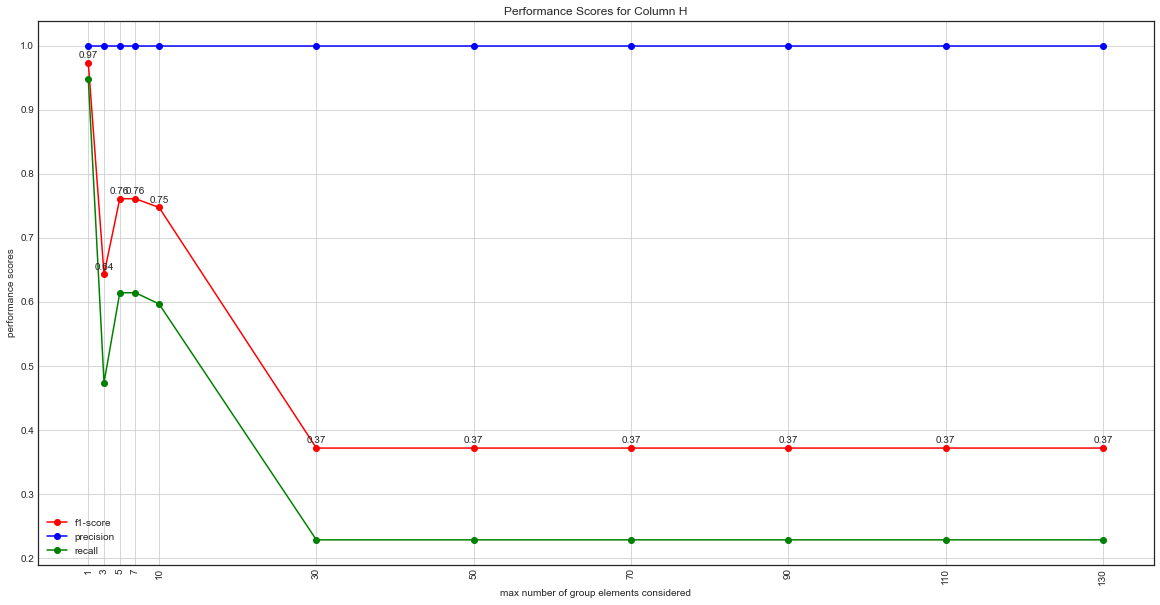

In [13]:
results = pickle.load(open("results/emd_results_sep_instances/labeling_performance_report_H.p","rb"))

group_count = []
f1_scores = []
precisions = []
recalls = []

for el in results:
    group_count.append(el["group_count"])
    f1_scores.append(el["classification_report"]["weighted avg"]["f1-score"])
    precisions.append(el["classification_report"]["weighted avg"]["precision"])
    recalls.append(el["classification_report"]["weighted avg"]["recall"])

fig, ax1 = plt.subplots(figsize=(20,10))

plt.xticks(list(range(1,9,2))+list(range(10,150,20)),rotation=90)
plt.grid(True, axis='both', which='both')
plt.title("Performance Scores for Column H")
plt.style.use('seaborn-white')


ax1.set_xlabel("max number of group elements considered")
ax1.set_ylabel("performance scores")
ax1.plot(group_count, f1_scores, color="red", marker="o", label="f1-score")
ax1.plot(group_count, precisions, color="blue", marker="o", label="precision")
ax1.plot(group_count, recalls, color="green", marker="o", label="recall")

# zip joins x and y coordinates in pairs
for x,y in zip(group_count, f1_scores):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax1.legend()


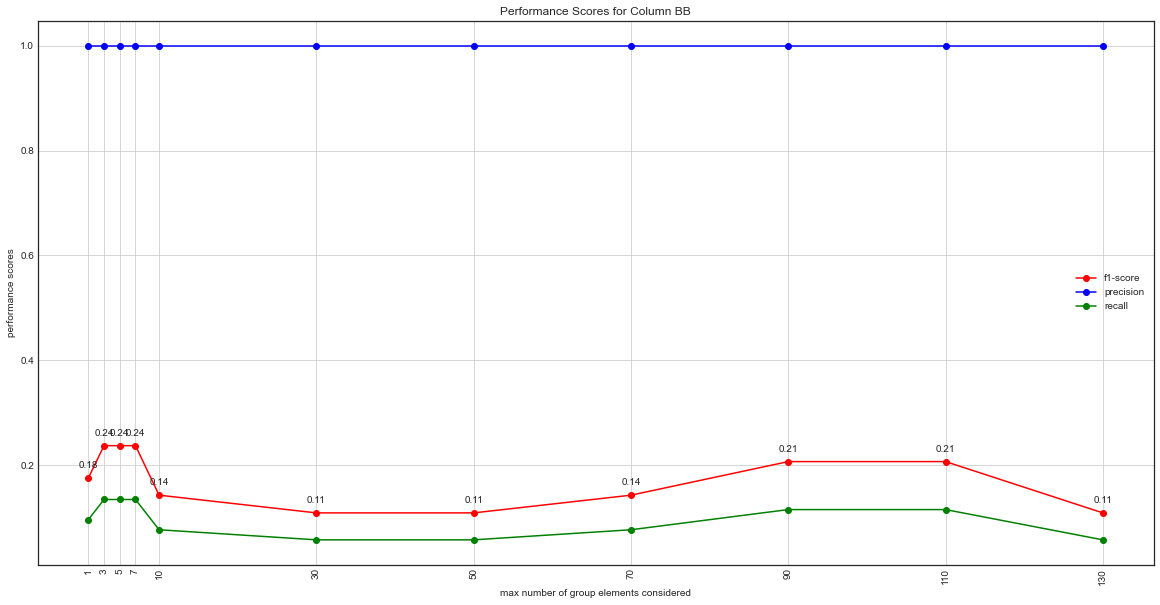

In [14]:
results = pickle.load(open("results/emd_results_sep_instances/labeling_performance_report_BB.p","rb"))

group_count = []
f1_scores = []
precisions = []
recalls = []

for el in results:
    group_count.append(el["group_count"])
    f1_scores.append(el["classification_report"]["weighted avg"]["f1-score"])
    precisions.append(el["classification_report"]["weighted avg"]["precision"])
    recalls.append(el["classification_report"]["weighted avg"]["recall"])

fig, ax1 = plt.subplots(figsize=(20,10))



ax1.set_xlabel("max number of group elements considered")
ax1.set_ylabel("performance scores")
ax1.plot(group_count, f1_scores, color="red", marker="o", label="f1-score")
ax1.plot(group_count, precisions, color="blue", marker="o", label="precision")
ax1.plot(group_count, recalls, color="green", marker="o", label="recall")

# zip joins x and y coordinates in pairs
for x,y in zip(group_count, f1_scores):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax1.legend()
plt.xticks(list(range(1,9,2))+list(range(10,150,20)),rotation=90)
plt.grid(True, axis='both', which='both')
plt.title("Performance Scores for Column BB")
plt.plot()
plt.savefig("/semantic_data_lake/semantic_data_lake/results/emd_results_sep_instances/class_report_BB.png")


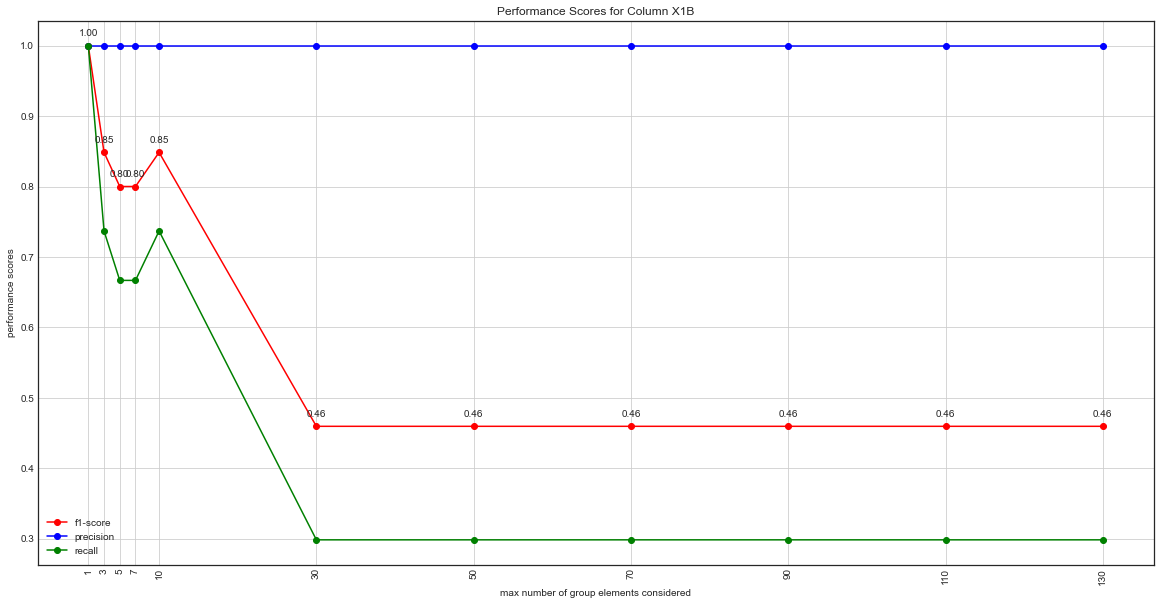

In [15]:
results = pickle.load(open("results/emd_results_sep_instances/labeling_performance_report_X1B.p","rb"))

group_count = []
f1_scores = []
precisions = []
recalls = []

for el in results:
    group_count.append(el["group_count"])
    f1_scores.append(el["classification_report"]["weighted avg"]["f1-score"])
    precisions.append(el["classification_report"]["weighted avg"]["precision"])
    recalls.append(el["classification_report"]["weighted avg"]["recall"])

fig, ax1 = plt.subplots(figsize=(20,10))

plt.xticks(list(range(1,9,2))+list(range(10,150,20)),rotation=90)
plt.grid(True, axis='both', which='both')
plt.title("Performance Scores for Column X1B")

ax1.set_xlabel("max number of group elements considered")
ax1.set_ylabel("performance scores")
ax1.plot(group_count, f1_scores, color="red", marker="o", label="f1-score")
ax1.plot(group_count, precisions, color="blue", marker="o", label="precision")
ax1.plot(group_count, recalls, color="green", marker="o", label="recall")

# zip joins x and y coordinates in pairs
for x,y in zip(group_count, f1_scores):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax1.legend()

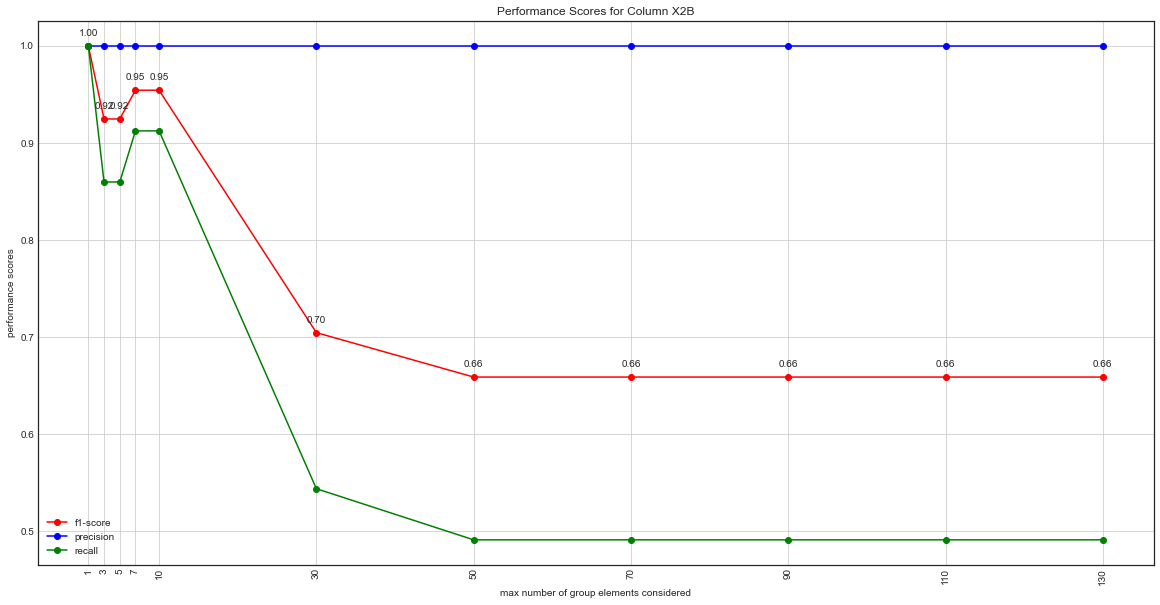

In [16]:
results = pickle.load(open("results/emd_results_sep_instances/labeling_performance_report_X2B.p","rb"))

group_count = []
f1_scores = []
precisions = []
recalls = []

for el in results:
    group_count.append(el["group_count"])
    f1_scores.append(el["classification_report"]["weighted avg"]["f1-score"])
    precisions.append(el["classification_report"]["weighted avg"]["precision"])
    recalls.append(el["classification_report"]["weighted avg"]["recall"])

fig, ax1 = plt.subplots(figsize=(20,10))

plt.xticks(list(range(1,9,2))+list(range(10,150,20)),rotation=90)
plt.grid(True, axis='both', which='both')
plt.title("Performance Scores for Column X2B")

ax1.set_xlabel("max number of group elements considered")
ax1.set_ylabel("performance scores")
ax1.plot(group_count, f1_scores, color="red", marker="o", label="f1-score")
ax1.plot(group_count, precisions, color="blue", marker="o", label="precision")
ax1.plot(group_count, recalls, color="green", marker="o", label="recall")


# zip joins x and y coordinates in pairs
for x,y in zip(group_count, f1_scores):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax1.legend()

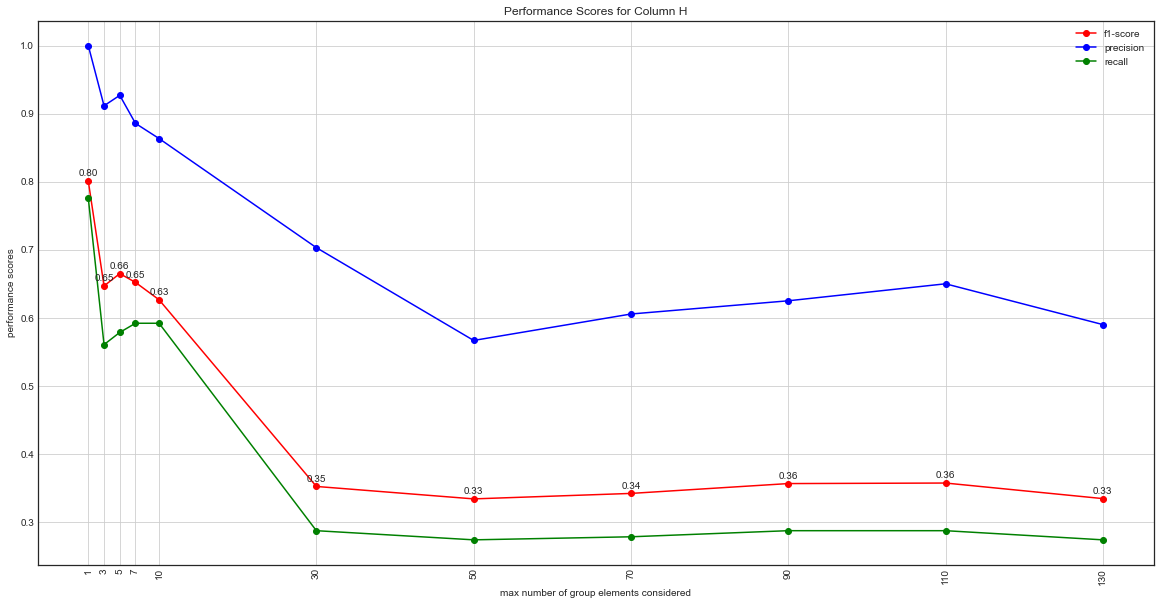

In [17]:
results = pickle.load(open("results/emd_results_sep_instances/labeling_performance_report_overall.p","rb"))

group_count = []
f1_scores = []
precisions = []
recalls = []

for el in results:
    group_count.append(el["group_count"])
    f1_scores.append(el["classification_report"]["weighted avg"]["f1-score"])
    precisions.append(el["classification_report"]["weighted avg"]["precision"])
    recalls.append(el["classification_report"]["weighted avg"]["recall"])

fig, ax1 = plt.subplots(figsize=(20,10))

plt.xticks(list(range(1,9,2))+list(range(10,150,20)),rotation=90)
plt.grid(True, axis='both', which='both')
plt.title("Performance Scores for Column H")
plt.style.use('seaborn-white')


ax1.set_xlabel("max number of group elements considered")
ax1.set_ylabel("performance scores")
ax1.plot(group_count, f1_scores, color="red", marker="o", label="f1-score")
ax1.plot(group_count, precisions, color="blue", marker="o", label="precision")
ax1.plot(group_count, recalls, color="green", marker="o", label="recall")

# zip joins x and y coordinates in pairs
for x,y in zip(group_count, f1_scores):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax1.legend()